## Putting it all together with a case study

The goal of this chapter is to guide you through a complete analysis using the unsupervised learning techniques covered in the first three chapters. You'll extend what you've learned by combining PCA as a preprocessing step to clustering using data that consist of measurements of cell nuclei of human breast masses.

### Preparing the data
Unlike prior chapters, where we prepared the data for you for unsupervised learning, the goal of this chapter is to step you through a more realistic and complete workflow.

Recall from the video that the first step is to download and prepare the data.

In [1]:
url <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1903/datasets/WisconsinCancer.csv"

# Download the data: wisc.df
wisc.df = read.csv(url)

# Convert the features of the data: wisc.data
wisc.data = as.matrix(wisc.df[,3:32])

# Set the row names of wisc.data
row.names(wisc.data) <- wisc.df$id

# Create diagnosis vector
diagnosis <- as.numeric(wisc.df$diagnosis == "M")

### Performing PCA
The next step in your analysis is to perform PCA on wisc.data.

You saw in the last chapter that it's important to check if the data need to be scaled before performing PCA. Recall two common reasons for scaling data:

1. The input variables use different units of measurement.
2. The input variables have significantly different variances.

In [2]:
# Check column means and standard deviations
colMeans(wisc.data)
apply(wisc.data, 2, sd)

# Execute PCA, scaling if appropriate: wisc.pr
wisc.pr = prcomp(wisc.data, scale = TRUE, center = TRUE)

# Look at summary of results
summary(wisc.pr)

radius_mean            texture_mean          perimeter_mean 
           1.412729e+01            1.928965e+01            9.196903e+01 
              area_mean         smoothness_mean        compactness_mean 
           6.548891e+02            9.636028e-02            1.043410e-01 
         concavity_mean     concave.points_mean           symmetry_mean 
           8.879932e-02            4.891915e-02            1.811619e-01 
 fractal_dimension_mean               radius_se              texture_se 
           6.279761e-02            4.051721e-01            1.216853e+00 
           perimeter_se                 area_se           smoothness_se 
           2.866059e+00            4.033708e+01            7.040979e-03 
         compactness_se            concavity_se       concave.points_se 
           2.547814e-02            3.189372e-02            1.179614e-02 
            symmetry_se    fractal_dimension_se            radius_worst 
           2.054230e-02            3.794904e-03            1.626919e+01 
          texture_worst         perimeter_worst              area_worst 
           2.567722e+01            1.072612e+02            8.805831e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           1.323686e-01            2.542650e-01            2.721885e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           1.146062e-01            2.900756e-01            8.394582e-02

radius_mean            texture_mean          perimeter_mean 
           3.524049e+00            4.301036e+00            2.429898e+01 
              area_mean         smoothness_mean        compactness_mean 
           3.519141e+02            1.406413e-02            5.281276e-02 
         concavity_mean     concave.points_mean           symmetry_mean 
           7.971981e-02            3.880284e-02            2.741428e-02 
 fractal_dimension_mean               radius_se              texture_se 
           7.060363e-03            2.773127e-01            5.516484e-01 
           perimeter_se                 area_se           smoothness_se 
           2.021855e+00            4.549101e+01            3.002518e-03 
         compactness_se            concavity_se       concave.points_se 
           1.790818e-02            3.018606e-02            6.170285e-03 
            symmetry_se    fractal_dimension_se            radius_worst 
           8.266372e-03            2.646071e-03            4.833242e+00 
          texture_worst         perimeter_worst              area_worst 
           6.146258e+00            3.360254e+01            5.693570e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           2.283243e-02            1.573365e-01            2.086243e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           6.573234e-02            6.186747e-02            1.806127e-02

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

### Interpreting PCA results
Now you'll use some visualizations to better understand your PCA model. You were introduced to one of these visualizations, the biplot, in an earlier chapter.

You'll run into some common challenges with using biplots on real-world data containing a non-trivial number of observations and variables, then you'll look at some alternative visualizations. You are encouraged to experiment with additional visualizations before moving on to the next exercise.

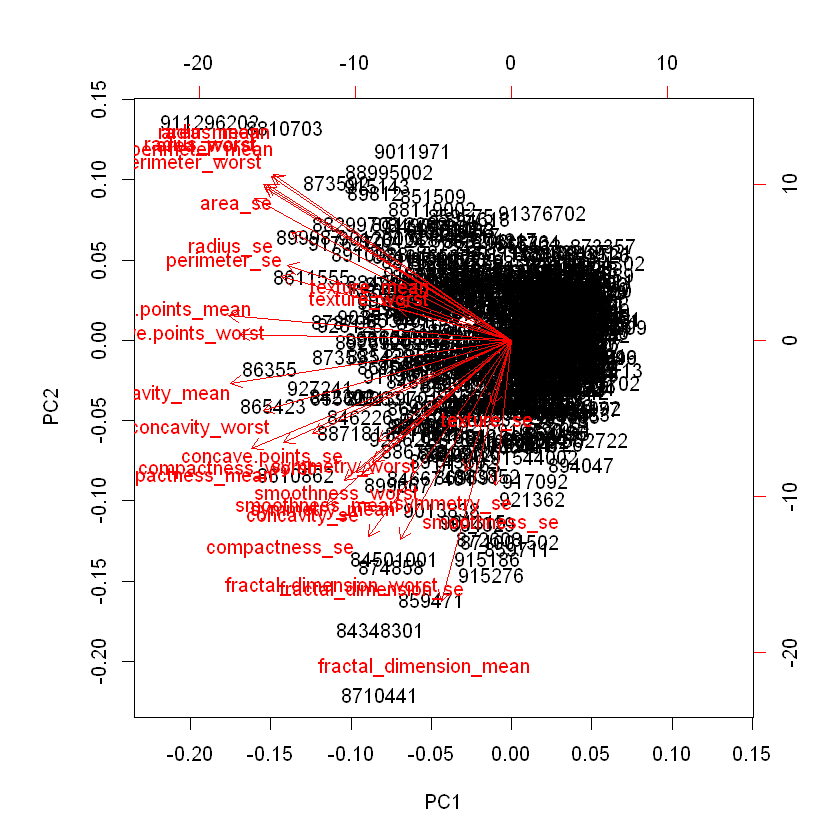

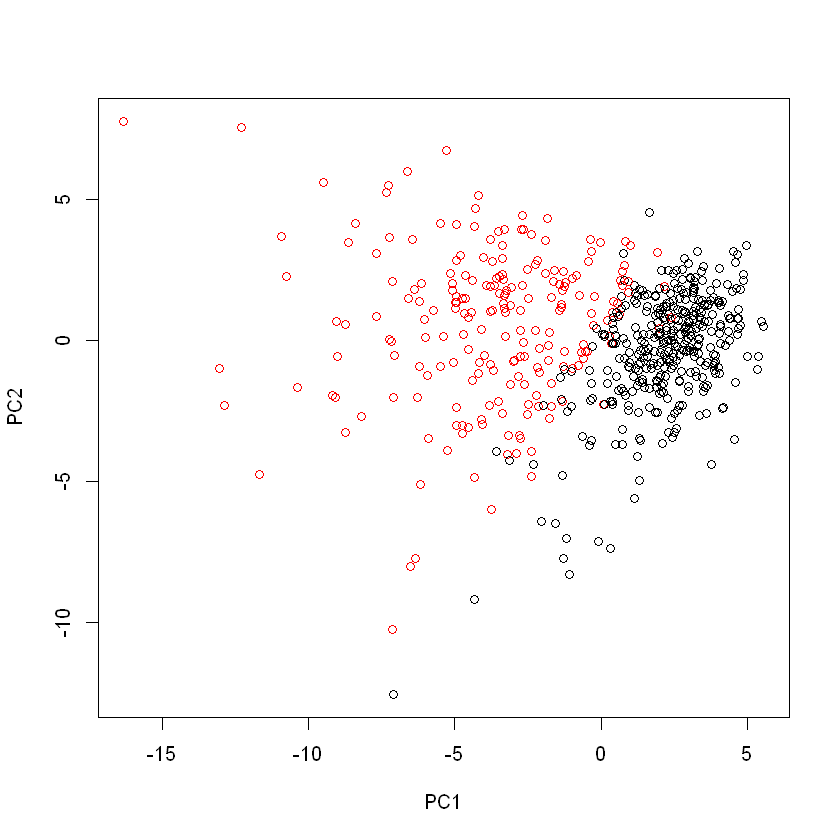

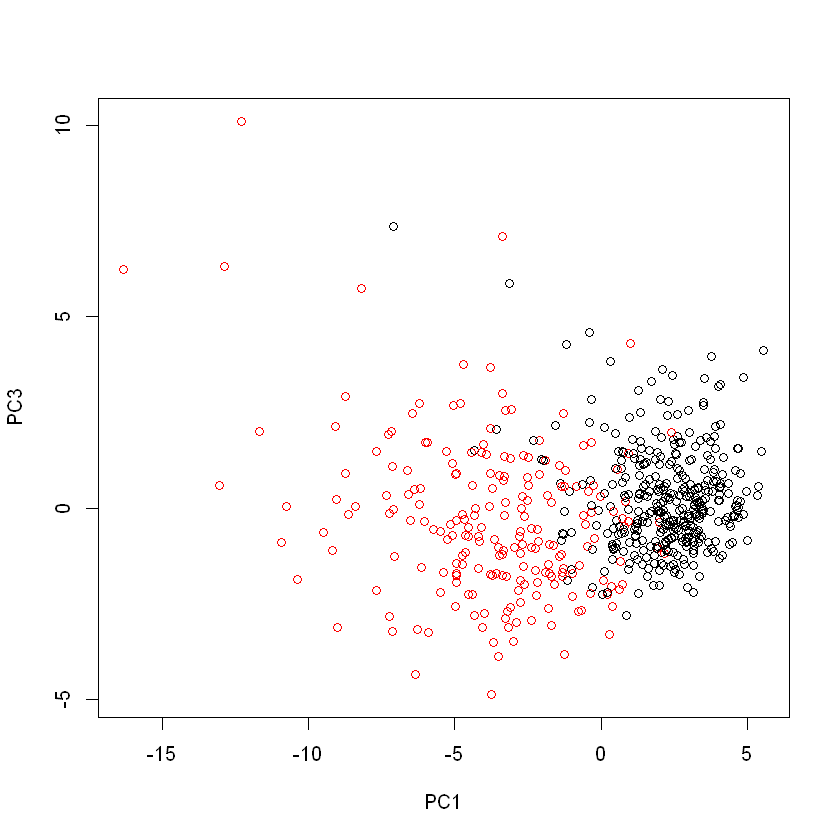

In [4]:
# Create a biplot of wisc.pr
biplot(wisc.pr)

# Scatter plot observations by components 1 and 2
plot(wisc.pr$x[, c(1, 2)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC2")

# Repeat for components 1 and 3
plot(wisc.pr$x[, c(1, 3)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC3")

### Variance explained
In this exercise, you will produce scree plots showing the proportion of variance explained as the number of principal components increases. The data from PCA must be prepared for these plots, as there is not a built-in function in R to create them directly from the PCA model.

As you look at these plots, ask yourself if there's an elbow in the amount of variance explained that might lead you to pick a natural number of principal components. If an obvious elbow does not exist, as is typical in real-world datasets, consider how else you might determine the number of principal components to retain based on the scree plot.

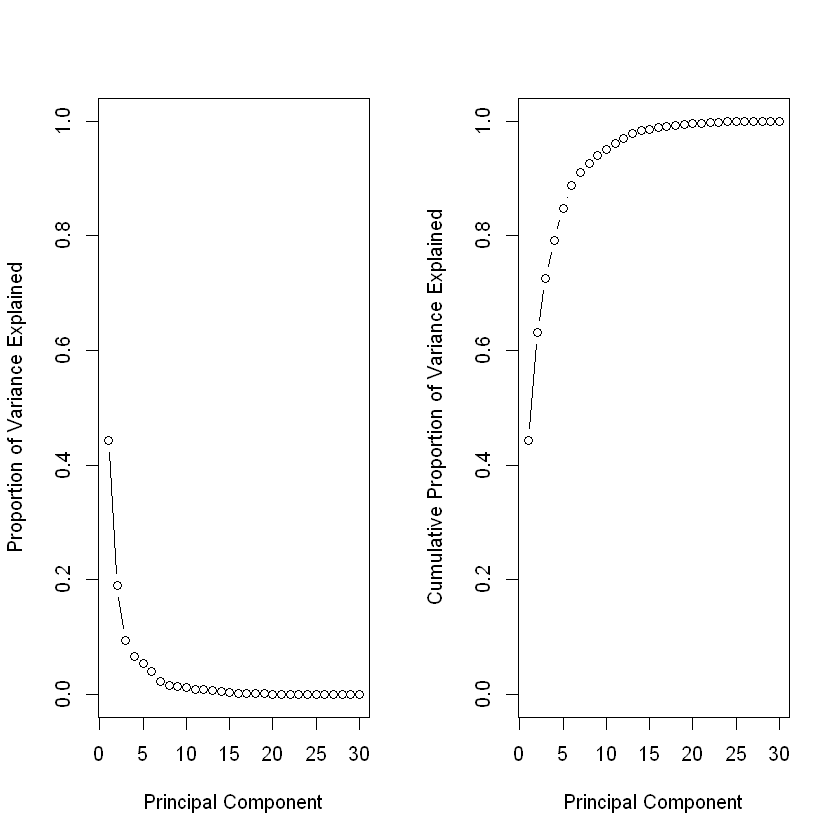

In [5]:
# Set up 1 x 2 plotting grid
par(mfrow = c(1, 2))

# Calculate variability of each component
pr.var = (wisc.pr$sdev)^2

# Variance explained by each principal component: pve
pve = pr.var/sum(pr.var)

# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component", 
     ylab = "Cumulative Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

### Hierarchical clustering of case data
The goal of this exercise is to do hierarchical clustering of the observations. Recall from Chapter 2 that this type of clustering does not assume in advance the number of natural groups that exist in the data.

As part of the preparation for hierarchical clustering, distance between all pairs of observations are computed. Furthermore, there are different ways to link clusters together, with single, complete, and average being the most common linkage methods.

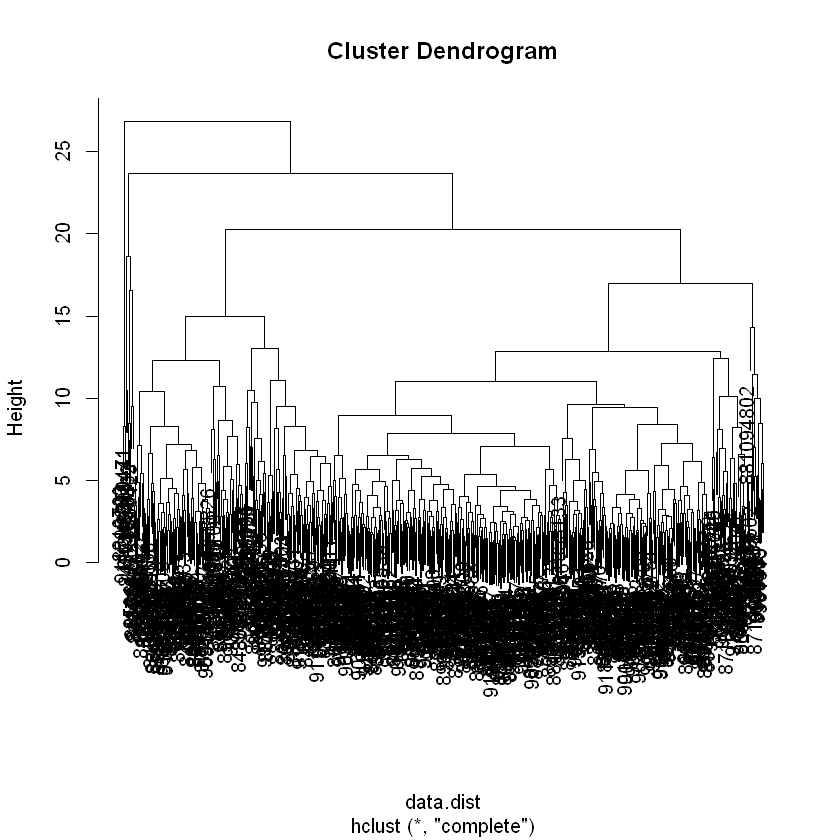

In [8]:
# Scale the wisc.data data: data.scaled
data.scaled = scale(wisc.data)

# Calculate the (Euclidean) distances: data.dist
data.dist = dist(data.scaled)

# Create a hierarchical clustering model: wisc.hclust
wisc.hclust = hclust(data.dist, method = "complete")

# plot the dendogram

plot(wisc.hclust)

### Selecting number of clusters
In this exercise, you will compare the outputs from your hierarchical clustering model to the actual diagnoses. Normally when performing unsupervised learning like this, a target variable isn't available. We do have it with this dataset, however, so it can be used to check the performance of the clustering model.

When performing supervised learning—that is, when you're trying to predict some target variable of interest and that target variable is available in the original data—using clustering to create new features may or may not improve the performance of the final model. This exercise will help you determine if, in this case, hierarchical clustering provides a promising new feature.

In [9]:
# Cut tree so that it has 4 clusters: wisc.hclust.clusters
wisc.hclust.clusters = cutree(wisc.hclust, k = 4)

# Compare cluster membership to actual diagnoses
table(wisc.hclust.clusters, diagnosis)

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

### k-means clustering and comparing results
As you now know, there are two main types of clustering: hierarchical and k-means.

In this exercise, you will create a k-means clustering model on the Wisconsin breast cancer data and compare the results to the actual diagnoses and the results of your hierarchical clustering model. Take some time to see how each clustering model performs in terms of separating the two diagnoses and how the clustering models compare to each other.

In [11]:
# Create a k-means model on wisc.data: wisc.km
wisc.km = kmeans(scale(wisc.data), centers = 2, nstart = 20)

# Compare k-means to actual diagnoses
table(wisc.km$cluster, diagnosis)

# Compare k-means to hierarchical clustering
table(wisc.km$cluster, wisc.hclust.clusters)

   diagnosis
      0   1
  1 343  37
  2  14 175

   wisc.hclust.clusters
      1   2   3   4
  1  17   0 363   0
  2 160   7  20   2

Looking at the second table you generated, it looks like clusters 1, 2, and 4 from the hierarchical clustering model can be interpreted as the cluster 1 equivalent from the k-means algorithm, and cluster 3 can be interpreted as the cluster 2 equivalent.

### Clustering on PCA results
In this final exercise, you will put together several steps you used earlier and, in doing so, you will experience some of the creativity that is typical in unsupervised learning.

Recall from earlier exercises that the PCA model required significantly fewer features to describe 80% and 95% of the variability of the data. In addition to normalizing data and potentially avoiding overfitting, PCA also uncorrelates the variables, sometimes improving the performance of other modeling techniques.

Let's see if PCA improves or degrades the performance of hierarchical clustering.

In [12]:
# check summary
summary(wisc.pr)

# Create a hierarchical clustering model: wisc.pr.hclust
wisc.pr.hclust <- hclust(dist(wisc.pr$x[, 1:7]), method = "complete")

# Cut model into 4 clusters: wisc.pr.hclust.clusters
wisc.pr.hclust.clusters = cutree(wisc.pr.hclust, k = 4)

# Compare to actual diagnoses
table(wisc.pr.hclust.clusters, diagnosis)

# Compare to k-means and hierarchical
table(wisc.hclust.clusters, diagnosis)
table(wisc.km$cluster, diagnosis)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

                       diagnosis
wisc.pr.hclust.clusters   0   1
                      1   5 113
                      2 350  97
                      3   2   0
                      4   0   2

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

   diagnosis
      0   1
  1 343  37
  2  14 175